#  Applied Machine Learning 

## Homework 6: Putting it all together 



## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [21]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#### <br><br>

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

#  1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on the dataset page on Kaggle.Write a few sentences on your initial thoughts on the problem and the dataset.

# Content
### There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# 2. Download the dataset and read it as a pandas dataframe. 

In [36]:
data = pd.read_csv('UCI_Credit_Card.csv')

data1 = data.copy()
data1.set_axis(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEP',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_SEP', 'BILL_AUG',
       'BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR', 'PRE_PAY_SEP',
       'PRE_PAY_AUG', 'PRE_PAY_JUL', 'PRE_PAY_JUN', 'PRE_PAY_MAY', 'PRE_PAY_APR',
       'TARGET'],axis=1,inplace=True)



# Removing unnecessary rows (outliers)
data1 = data1[data1["LIMIT_BAL"] < 1000000]
data1 = data1[data1['PRE_PAY_AUG'] < 1000000]

In [17]:
# Description :-In this scenario From above Data we have to saperate our dataset in numerical and categorical features i 
#               have identified these features below.

# -----------------Categorical--------------------------
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# 'PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR' (Repayment status)

# -----------------Numerical---------------------------
#  'ID','AGE','BILL_SEP', 'BILL_AUG','BILL_JUL', 'BILL_JUN', 'BILL_MAY', 'BILL_APR', 'PRE_PAY_SEP',
#  'PRE_PAY_AUG', 'PRE_PAY_JUL', 'PRE_PAY_JUN', 'PRE_PAY_MAY', 'PRE_PAY_APR'

# y_value = "TARGET"

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
x,y = data1.drop(columns="TARGET"),data1["TARGET"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=143)

In [9]:
# in above code we are splitting our data in 80% for training portion and 20% for test portion.

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [22]:
# RUN THIS CODE TO GET PERFECT EDA WITH VISUALIZATIONS.
from ydata_profiling import profile_report
x.profile_report()

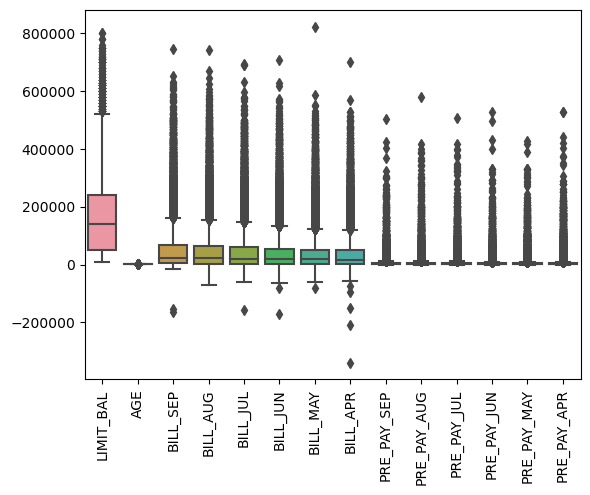

In [26]:
box = sns.boxplot(data=data1[['LIMIT_BAL','AGE', 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY',
       'BILL_APR', 'PRE_PAY_SEP', 'PRE_PAY_AUG', 'PRE_PAY_JUL', 'PRE_PAY_JUN',
       'PRE_PAY_MAY', 'PRE_PAY_APR']])
box.set_xticklabels(['LIMIT_BAL','AGE', 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY',
       'BILL_APR', 'PRE_PAY_SEP', 'PRE_PAY_AUG', 'PRE_PAY_JUL', 'PRE_PAY_JUN',
       'PRE_PAY_MAY', 'PRE_PAY_APR'],rotation = 90)
plt.show()

In [21]:
data1.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PRE_PAY_SEP,PRE_PAY_AUG,PRE_PAY_JUL,PRE_PAY_JUN,PRE_PAY_MAY,PRE_PAY_APR,TARGET
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000
mean,15000.001734,167431.227871,1.603667,1.853209,1.551859,35.485114,-0.016569,-0.133656,-0.166061,-0.220503,...,43224.035173,40271.185364,38816.552625,5617.107518,5748.719920,5157.470312,4801.216669,4780.849508,5208.326121,0.221237
std,8659.714148,129635.283534,0.489143,0.790325,0.521911,9.218286,1.123808,1.197216,1.196891,1.169156,...,64138.758574,60569.281931,59269.229791,15533.010898,17432.007481,16007.859281,15246.442636,15107.485895,17758.189672,0.415087
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.500000,1763.000000,1256.000000,1000.000000,832.500000,390.000000,296.000000,251.000000,116.500000,0.000000
50%,15000.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19050.000000,18101.000000,17067.000000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22498.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54478.000000,50173.000000,49146.500000,5006.000000,5000.000000,4503.000000,4012.500000,4029.500000,4000.000000,0.000000
max,30000.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,699944.000000,505000.000000,580464.000000,508229.000000,528897.000000,426529.000000,528666.000000,1.000000


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [37]:
# IDENTIFIED DIFFERENT FEATURE TYPES FROM CURRENT DATASET
numeric_features_prepro = ['LIMIT_BAL','AGE', 'BILL_SEP', 'BILL_AUG', 'BILL_JUL', 'BILL_JUN', 'BILL_MAY',
       'BILL_APR', 'PRE_PAY_SEP', 'PRE_PAY_AUG', 'PRE_PAY_JUL', 'PRE_PAY_JUN',
       'PRE_PAY_MAY', 'PRE_PAY_APR']

ordinal_features1 = ['PAY_SEP','PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
categories1=[[-2,-1,0,1,2,3,4,5,6,7,8],
             [-2,-1,0,1,2,3,4,5,6,7,8],
             [-2,-1,0,1,2,3,4,5,6,7,8],
             [-2,-1,0,1,2,3,4,5,6,7,8],
             [-2,-1,0,1,2,3,4,5,6,7,8],
             [-2,-1,0,1,2,3,4,5,6,7,8]             
            ]

ordinal_features2 = ['EDUCATION']
categories2 = [0,1,2,3,4,5,6]

categorical_features= ["SEX","MARRIAGE"]



# CREATED PIPELINE FOR EACH TYPE OF FEATURES TO PERFORM PREPROCESSING AND TO USE IN COLUMN_TRANSFORMER
std = make_pipeline(StandardScaler())
ord1 = make_pipeline(OrdinalEncoder(categories=categories1))
ord2 = make_pipeline(OrdinalEncoder(categories=[categories2]))
ohe = make_pipeline(OneHotEncoder(drop="if_binary"))



# CREATED COLUMN TRANSFORM WITH ALL PIPELINES TO PERFORM ON SUITABLE FEATURES
preprocessor = make_column_transformer(
    (std,numeric_features_prepro),
    (ord1,ordinal_features1),
    (ord2,ordinal_features2),
    (ohe,categorical_features),
    remainder='drop'
)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [38]:
# BASELINE MODEL
pipe_bl = make_pipeline(preprocessor,DummyClassifier())
pipe_bl.fit(x_train,y_train)
pipe_bl.score(x_test,y_test)

0.7732955492582096

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [39]:
# LogisticRegression
pipe_lr = make_pipeline(preprocessor,LogisticRegression())
pipe_lr.fit(x_train,y_train)
pipe_lr.score(x_test,y_test)

0.8034672445407568

In [40]:
# EXTRACTING BEST HYPERPARAMETER FOR BETTER PERFORMANCE (ACCURACY)
param_grid = [{
    "logisticregression__C" : [0.1,0.28,0.285,0.29,0.3,0.31]
    }
]
grid_cv = GridSearchCV(pipe_lr,param_grid,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
grid_cv.fit(x_train,y_train)
grid_cv.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'logisticregression__C': 0.29}

In [41]:
cv_result = pd.DataFrame(grid_cv.cv_results_).set_index('rank_test_score').sort_index()
cv_result[['param_logisticregression__C','mean_test_score','std_test_score',]]

,param_logisticregression__C,mean_test_score,std_test_score
rank_test_score,,,
1,0.29,0.811552,0.000956
2,0.3,0.811427,0.000840
3,0.285,0.811302,0.000925
4,0.28,0.811260,0.000937
4,0.31,0.811260,0.000955
6,0.1,0.811177,0.000896


<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

### SVM

In [42]:
# SUPPORT VECTOR MACHINE
pipe_svc = make_pipeline(preprocessor, SVC())
pipe_svc.fit(x_train,y_train)
pipe_svc.score(x_test,y_test)

0.8154692448741457

<br>

### RandomforestClassifier

In [43]:
# DEFAULT IT IS USING MULTIPLE DECISIONTREECLASSIFIER
pipe_rf = make_pipeline(preprocessor,RandomForestClassifier())
pipe_rf.fit(x_train,y_train)
pipe_rf.score(x_test,y_test)

0.8148024670778463

<br>


### DecisionTreeClassifier

In [44]:
pipe_dc = make_pipeline(preprocessor,DecisionTreeClassifier())
pipe_dc.fit(x_train,y_train)
pipe_dc.score(x_test,y_test)

0.7229538256376062

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [47]:
# USING SVM FROM ABOVE RESULTS OF ACCURACY
pipe_svc = make_pipeline(preprocessor, SVC())

In [48]:
param_grid_svc = {
    'svc__C': 10.0 ** np.arange(-2,3,1),
    'svc__gamma': 10.0 ** np.arange(-2,3,1)    
}

In [49]:
grid_search_svc = GridSearchCV(pipe_svc, param_grid_svc, n_jobs=-1,verbose=True, return_train_score=True, cv=2 )
grid_search_svc.fit(x_train,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_SEP',
                                                                          'BILL_AUG',
                                                                          'BILL_JUL',
                                                                          'BILL_JUN',
                                                                          'BILL_MAY',
                

In [52]:
grid_search_svc.best_score_

0.8205117519586598

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [93]:
# pip install eli5 <= USE THIS CODE TO INSTALL ELI5 IF NOT EXIST
import eli5

features = numeric_features_prepro + ordinal_features1 + ordinal_features2 + pipe_svc.named_steps['columntransformer'].transformers_[3][1].named_steps["onehotencoder"].get_feature_names_out(categorical_features).tolist()
pipe_lr = make_pipeline(preprocessor,LogisticRegression())
pipe_lr.fit(x_train,y_train)
eli5.explain_weights(pipe_lr.named_steps["logisticregression"], feature_names=features)

Explanation(estimator='LogisticRegression()', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='PAY_SEP', weight=0.5707916613760082, std=None, value=None), FeatureWeight(feature='BILL_JUL', weight=0.18447233922685044, std=None, value=None), FeatureWeight(feature='BILL_AUG', weight=0.12800198374089414, std=None, value=None), FeatureWeight(feature='PAY_AUG', weight=0.08414743440173886, std=None, value=None), FeatureWeight(feature='PAY_JUL', weight=0.07791619554898632, std=None, value=None), FeatureWeight(feature='AGE', weight=0.04997708447075332, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-2.475156629747874, std=None, value=None), FeatureWeight(feature='MARRIAGE_0', weight=-1.1492063250985112, std=None, value=None), FeatureWeight(feature='MARRIAGE_2', weight=-0.3879882231080056, std=None, value=None), FeatureWeight(feature='BILL_SEP', weight=-0.3863302452889193, std=None, value=None), FeatureWeight(feature='MARRIAGE_3', weight=-0.34418219263122934, std=None, value=None), FeatureWeight(feature='PRE_PAY_AUG', weight=-0.2146531489102094, std=None, value=None), FeatureWeight(feature='PRE_PAY_SEP', weight=-0.2141009801799377, std=None, value=None), FeatureWeight(feature='MARRIAGE_1', weight=-0.1971860168453079, std=None, value=None), FeatureWeight(feature='SEX_2', weight=-0.12583413626648973, std=None, value=None), FeatureWeight(feature='EDUCATION', weight=-0.10322433458829122, std=None, value=None), FeatureWeight(feature='LIMIT_BAL', weight=-0.08347630338885721, std=None, value=None), FeatureWeight(feature='PRE_PAY_MAY', weight=-0.07088656281503553, std=None, value=None), FeatureWeight(feature='PRE_PAY_JUN', weight=-0.05299444203559988, std=None, value=None), FeatureWeight(feature='BILL_JUN', weight=-0.04943233163599879, std=None, value=None)], pos_remaining=5, neg_remaining=2), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [94]:
# TESTING NEW EXAMPLES ON OUR BEST MODEL
grid_search_svc.best_estimator_.score(x_test,y_test)

0.8164694115685948

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

In [96]:
# USING CLASSIFICATION_REPORT TO SHOW CONFUSION METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test,grid_search_svc.best_estimator_.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4639
           1       0.70      0.34      0.45      1360

    accuracy                           0.82      5999
   macro avg       0.76      0.65      0.67      5999
weighted avg       0.80      0.82      0.79      5999



<br><br><br><br>